In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


data = pd.read_csv('games_details.csv')
data.head(30)

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive rows that have null values 


In [2]:
data.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [3]:

# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = data[ data['FGM'].isnull() ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.head(30)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


#### Drop irrelevant/repetitive variables such as NICKNAME and COMMENT

In [4]:
data.drop(['NICKNAME'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)
data.drop(['TEAM_CITY'], axis=1, inplace=True)

## Task 1 Describing the Data

In [5]:
task_1= data
data.to_csv('216359770-215614720-216846396-T1.csv', index=False)
t1 = pd.read_csv('216359770-215614720-216846396-T1.csv')


##### Drop all dimensions except 5 

In [6]:
t1.drop(['GAME_ID'], axis=1, inplace=True)
t1.drop(['TEAM_ID'], axis=1, inplace=True)
t1.drop(['PLAYER_ID'], axis=1, inplace=True)
t1.drop(['MIN'], axis=1, inplace=True)
t1.drop(['FGM'], axis=1, inplace=True)
t1.drop(['FGA'], axis=1, inplace=True)
t1.drop(['FG3M'], axis=1, inplace=True)
t1.drop(['FG3A'], axis=1, inplace=True)

t1.drop(['PLUS_MINUS'], axis=1, inplace=True)
t1.drop(['DREB'], axis=1, inplace=True)
t1.drop(['OREB'], axis=1, inplace=True)
t1.drop(['FTM'], axis=1, inplace=True)
t1.drop(['FTA'], axis=1, inplace=True)
t1.drop(['TO'], axis=1, inplace=True)
t1.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
t1.drop(['FG_PCT'], axis=1, inplace=True)
t1.drop(['FG3_PCT'], axis=1, inplace=True)
t1.drop(['FT_PCT'], axis=1, inplace=True)
t1.drop(['PF'], axis=1, inplace=True)
t1.drop(['BLK'], axis=1, inplace=True)
t1.head()

,START_POSITION,REB,AST,STL,PTS
0,F,6.0,2.0,1.0,3.0
1,F,5.0,3.0,1.0,5.0
2,C,9.0,1.0,2.0,20.0
3,G,3.0,7.0,2.0,24.0
4,G,3.0,2.0,0.0,0.0


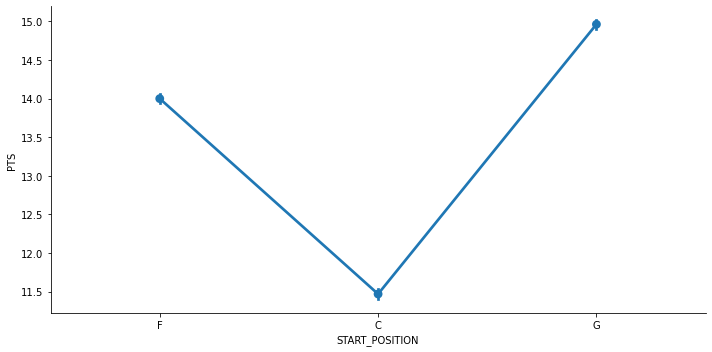

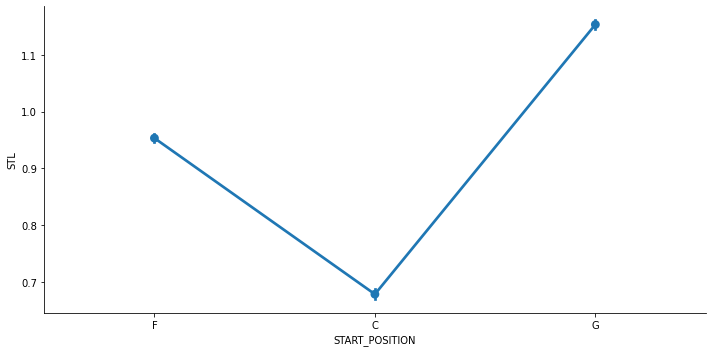

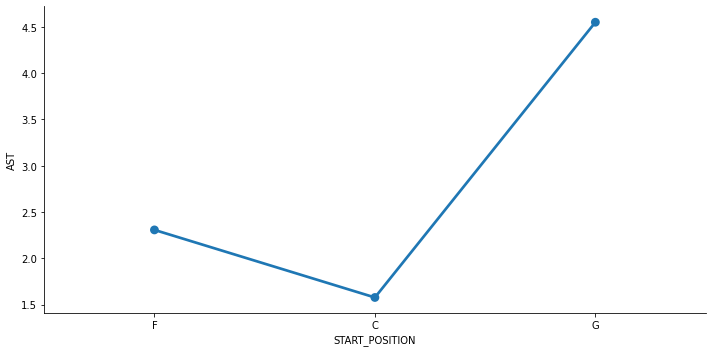

<Figure size 432x288 with 0 Axes>

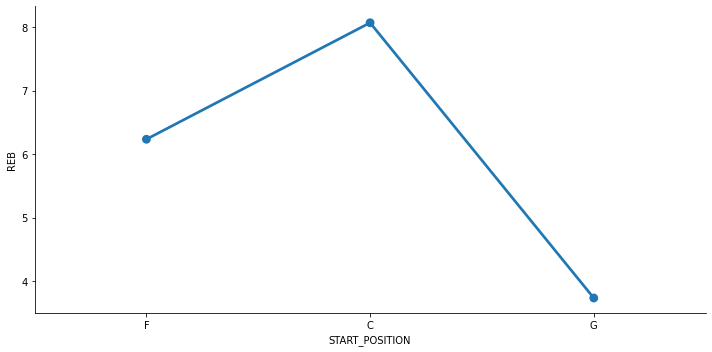

In [7]:
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sns.catplot(x=col, y='PTS', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sns.catplot(x=col, y='STL', data=data, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sns.catplot(x=col, y='AST', data=data, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sns.catplot(x=col, y='REB', data=data, kind='point', aspect=2, )


# analysis needed for task 1 ^

### Task 4 Principal Component Analysis preprocessing
#### convert name attributes into numerical
#### remove rest NaN

In [8]:
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
data['START_POSITION'] = data['START_POSITION'].map(START_POSITION_num)
data['START_POSITION'] = data['START_POSITION'].replace(np.nan, 4)
data['PLUS_MINUS'].fillna(data['PLUS_MINUS'].mean(), inplace=True)
data.isnull().sum()
data.head(20)


,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,203484,Kentavious Caldwell-Pope,1.0,27:41,1.0,6.0,0.167,0.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,1628398,Kyle Kuzma,1.0,30:28,2.0,12.0,0.167,1.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,1629655,Daniel Gafford,2.0,24:21,9.0,12.0,0.750,0.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,203078,Bradley Beal,3.0,35:07,9.0,20.0,0.450,5.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,203915,Spencer Dinwiddie,3.0,28:34,0.0,5.0,0.000,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,203526,Raul Neto,4.0,17:59,1.0,6.0,0.167,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,1626149,Montrezl Harrell,4.0,22:12,6.0,9.0,0.667,0.0,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,1630166,Deni Avdija,4.0,24:59,2.0,9.0,0.222,1.0,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,1630557,Corey Kispert,4.0,11:25,2.0,4.0,0.500,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,1628988,Aaron Holiday,4.0,12:53,1.0,6.0,0.167,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


## Task 4 Principal Component Analysis

In [9]:
task_4= data
data.to_csv('216359770-215614720-216846396-T4.csv', index=False)
t4 = pd.read_csv('216359770-215614720-216846396-T4.csv')

#### drop extra dimensions

In [10]:
t4.drop(['GAME_ID'], axis=1, inplace=True)
t4.drop(['TEAM_ID'], axis=1, inplace=True)
t4.drop(['PLAYER_ID'], axis=1, inplace=True)
t4.drop(['MIN'], axis=1, inplace=True)
t4.drop(['FGM'], axis=1, inplace=True)
t4.drop(['FGA'], axis=1, inplace=True)
t4.drop(['FG3M'], axis=1, inplace=True)
t4.drop(['FG3A'], axis=1, inplace=True)
t4.drop(['PLUS_MINUS'], axis=1, inplace=True)
t4.drop(['DREB'], axis=1, inplace=True)
t4.drop(['OREB'], axis=1, inplace=True)
t4.drop(['FTM'], axis=1, inplace=True)
t4.drop(['FTA'], axis=1, inplace=True)
t4.drop(['TO'], axis=1, inplace=True)
t4.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
# t1.drop(['FG_PCT'], axis=1, inplace=True)
# t1.drop(['FG3_PCT'], axis=1, inplace=True)
# t1.drop(['FT_PCT'], axis=1, inplace=True)
# t1.drop(['PF'], axis=1, inplace=True)
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


# PCA Analysis

In [11]:
from sklearn.preprocessing import StandardScaler
scalar_data=t4
scaler = StandardScaler()
scaler.fit(scalar_data)
scaled_data = scaler.transform(scalar_data)
from sklearn.decomposition import PCA
# scalar_data

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [12]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(523751, 10)

In [13]:
x_pca.shape

(523751, 2)

Text(0, 0.5, 'Second Principal Component')

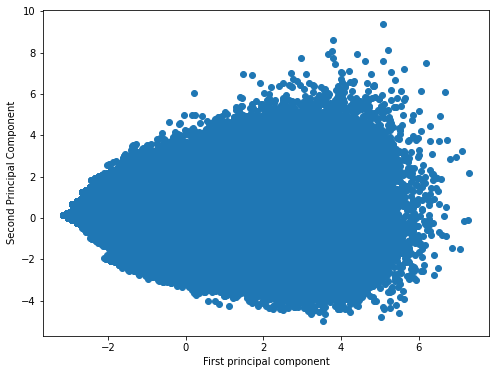

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [15]:
df_comp = pd.DataFrame(pca.components_,columns=scalar_data.columns)

<AxesSubplot:>

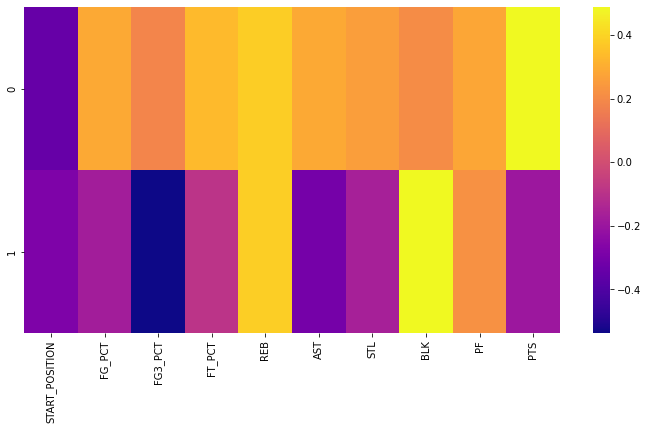

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

### Task 5: Similarity Measurement
#### From your data set select the object type with most numeric dimensions. For this task we will use only numeric dimensions of that object type; so, ignore the other dimensions. If the number of numeric dimensions is more than 5 in this object type, then you many select any 5 numeric dimensions and leave the additional
##### dropping all non numeric entities, and additional numberic entities

In [17]:
task_5= data
data.to_csv('216359770-215614720-216846396-T5.csv', index=False)
t5 = pd.read_csv('216359770-215614720-216846396-T5.csv')

In [18]:
t5.drop(['GAME_ID'], axis=1, inplace=True)
t5.drop(['TEAM_ID'], axis=1, inplace=True)
t5.drop(['PLAYER_ID'], axis=1, inplace=True)
t5.drop(['MIN'], axis=1, inplace=True)
t5.drop(['FGM'], axis=1, inplace=True)
t5.drop(['FGA'], axis=1, inplace=True)
t5.drop(['FG3M'], axis=1, inplace=True)
t5.drop(['FG3A'], axis=1, inplace=True)
t5.drop(['BLK'], axis=1, inplace=True)

t5.drop(['PLUS_MINUS'], axis=1, inplace=True)
t5.drop(['DREB'], axis=1, inplace=True)
t5.drop(['OREB'], axis=1, inplace=True)
t5.drop(['FTM'], axis=1, inplace=True)
t5.drop(['FTA'], axis=1, inplace=True)
t5.drop(['TO'], axis=1, inplace=True)
t5.drop(['PLAYER_NAME'], axis=1, inplace=True)
# data.drop(['START_POSITION'], axis=1, inplace=True)
t5.drop(['FG_PCT'], axis=1, inplace=True)
t5.drop(['FG3_PCT'], axis=1, inplace=True)
t5.drop(['FT_PCT'], axis=1, inplace=True)
t5.drop(['PF'], axis=1, inplace=True)
t5.head()

# TEAM_ID                   0
# TEAM_ABBREVIATION         0
# TEAM_CITY                 0
# PLAYER_ID                 0
# PLAYER_NAME               0
# NICKNAME             615626
# START_POSITION       386736
# COMMENT              523752
# MIN                  102360
# FGM                  102360
# FGA                  102360
# FG_PCT               102360
# FG3M                 102360
# FG3A                 102360
# FG3_PCT              102360
# FTM                  102360
# FTA                  102360
# FT_PCT               102360
# OREB                 102360
# DREB                 102360
# REB                  102360
# AST                  102360
# STL                  102360
# BLK                  102360
# TO                   102360
# PF                   102360
# PTS                  102360
# PLUS_MINUS           126021
# dtype: int64

,START_POSITION,REB,AST,STL,PTS
0,1.0,6.0,2.0,1.0,3.0
1,1.0,5.0,3.0,1.0,5.0
2,2.0,9.0,1.0,2.0,20.0
3,3.0,3.0,7.0,2.0,24.0
4,3.0,3.0,2.0,0.0,0.0


##### Submit your filtered data, the data for the selected dimensions, in the form of a CSV file: name it as 100131001-100131002—T5Data.csv